In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1차 EDA
1. holiday , workingday 컬럼을 종합해서 day_type 새로운 칼럼 생성. 기존 두 칼럼은 삭제\
2. datetime 자료형인 인덱스에서 hour만 추출해서 칼럼으로 추가\
결과물: `preprocessed_train.csv`

In [2]:
train_data = pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv', index_col='datetime')
test_data = pd.read_csv('/kaggle/input/bike-sharing-demand/test.csv', index_col='datetime')
train_data.index = pd.to_datetime(train_data.index)
test_data.index = pd.to_datetime(test_data.index)

In [3]:
train_x = train_data.iloc[:,:-3]
train_y = train_data.iloc[:,-1]

In [4]:
train_x.shape, train_y.shape

((10886, 8), (10886,))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


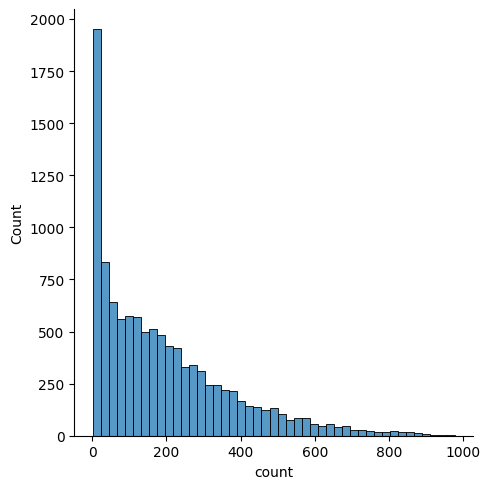

In [5]:
sns.displot(train_y)

In [6]:
grouped_by_day = train_data.groupby(['holiday', 'workingday'])['count'].describe()

In [7]:
grouped_by_day

count        mean         std  min   25%    50%    75%  \
holiday workingday                                                            
0       0           3163.0  188.765096  174.271888  1.0  44.0  128.0  303.5   
        1           7412.0  193.011873  184.513659  1.0  41.0  151.0  277.0   
1       0            311.0  185.877814  168.300531  1.0  38.5  133.0  308.0   

                      max  
holiday workingday         
0       0           783.0  
        1           977.0  
1       0           712.0

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


<Axes: >

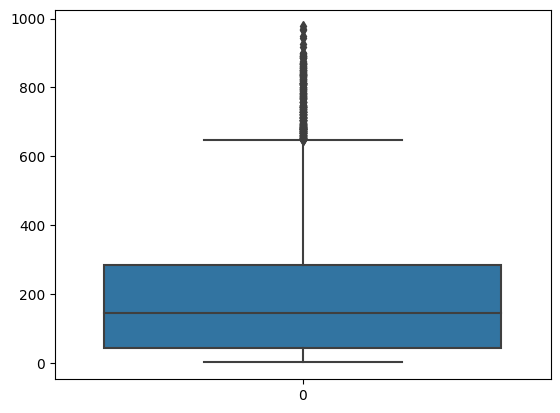

In [8]:
sns.boxplot(train_data['count'])

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


<Axes: >

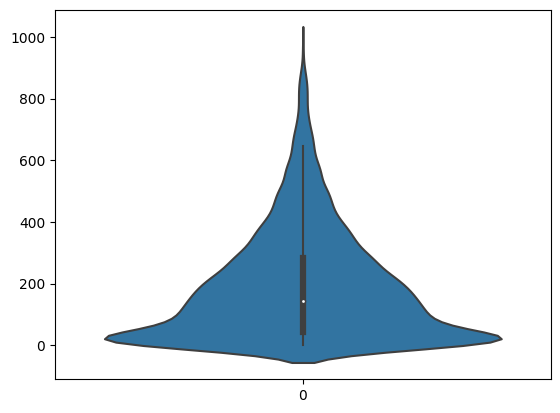

In [9]:
sns.violinplot(train_data['count'])

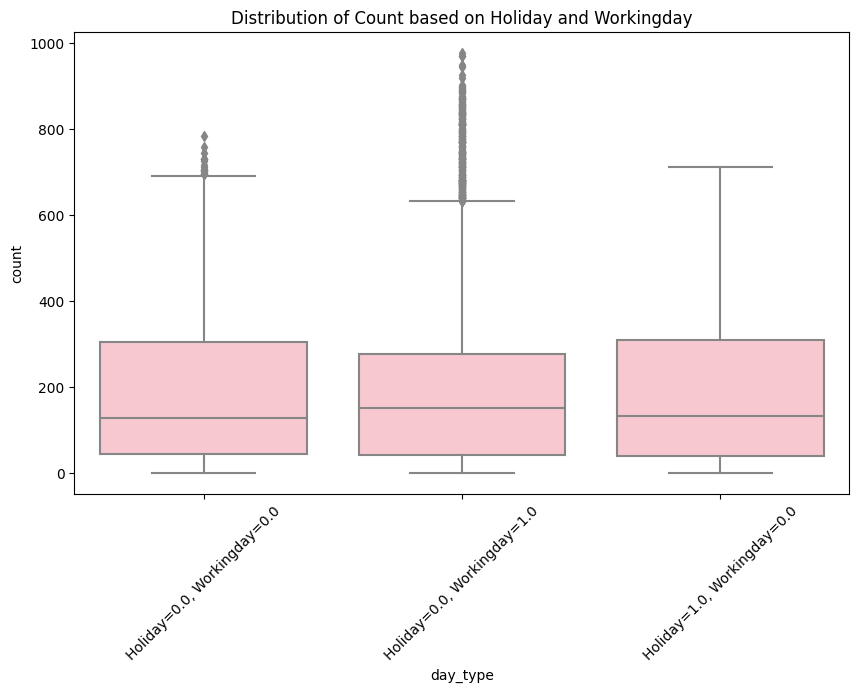

In [10]:
train_data['day_type'] = train_data.apply(lambda row: f"Holiday={row['holiday']}, Workingday={row['workingday']}", axis=1)
plt.figure(figsize=(10,6))
sns.boxplot(x='day_type', y='count', data=train_data, color='pink')
plt.title('Distribution of Count based on Holiday and Workingday')
plt.xticks(rotation=45)
plt.show()

정리

Categorical data : season / holiday / workingday / weather

Numerical data : temp / atemp / humidity / windspeed /

Y : count

In [11]:
def get_daytype(row):
    if row['holiday'] == 0 and row['workingday'] == 1: #workingday
        return 1
    elif row['holiday'] == 0 and row['workingday'] == 0: #weekend
        return 2
    elif row['holiday'] == 1 and row['workingday'] == 0: #holiday
        return 3

In [12]:
train_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_type
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,"Holiday=0.0, Workingday=0.0"
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,"Holiday=0.0, Workingday=0.0"
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,"Holiday=0.0, Workingday=0.0"
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,"Holiday=0.0, Workingday=0.0"
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,"Holiday=0.0, Workingday=0.0"
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,"Holiday=0.0, Workingday=1.0"
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,"Holiday=0.0, Workingday=1.0"
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,"Holiday=0.0, Workingday=1.0"


In [13]:
train_data = train_data.drop(['day_type'], axis=1)

In [14]:
train_data['day_type'] = train_data.apply(get_daytype, axis=1)
train_data = train_data.drop(columns=['holiday', 'workingday'])
train_data

,season,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_type
datetime,,,,,,,,,,
2011-01-01 00:00:00,1,1,9.84,14.395,81,0.0000,3,13,16,2
2011-01-01 01:00:00,1,1,9.02,13.635,80,0.0000,8,32,40,2
2011-01-01 02:00:00,1,1,9.02,13.635,80,0.0000,5,27,32,2
2011-01-01 03:00:00,1,1,9.84,14.395,75,0.0000,3,10,13,2
2011-01-01 04:00:00,1,1,9.84,14.395,75,0.0000,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,1,15.58,19.695,50,26.0027,7,329,336,1
2012-12-19 20:00:00,4,1,14.76,17.425,57,15.0013,10,231,241,1
2012-12-19 21:00:00,4,1,13.94,15.910,61,15.0013,4,164,168,1


In [15]:
#train_data['day_type'].value_counts()
#train_data['season'].value_counts()
#train_data['weather'].value_counts()

In [16]:
train_data

,season,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_type
datetime,,,,,,,,,,
2011-01-01 00:00:00,1,1,9.84,14.395,81,0.0000,3,13,16,2
2011-01-01 01:00:00,1,1,9.02,13.635,80,0.0000,8,32,40,2
2011-01-01 02:00:00,1,1,9.02,13.635,80,0.0000,5,27,32,2
2011-01-01 03:00:00,1,1,9.84,14.395,75,0.0000,3,10,13,2
2011-01-01 04:00:00,1,1,9.84,14.395,75,0.0000,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,1,15.58,19.695,50,26.0027,7,329,336,1
2012-12-19 20:00:00,4,1,14.76,17.425,57,15.0013,10,231,241,1
2012-12-19 21:00:00,4,1,13.94,15.910,61,15.0013,4,164,168,1


In [17]:
train_x = train_data.drop(columns=['casual', 'registered', 'count'])
train_y = train_data['count']

In [18]:
display(train_x)
display(train_y)

,season,weather,temp,atemp,humidity,windspeed,day_type
datetime,,,,,,,
2011-01-01 00:00:00,1,1,9.84,14.395,81,0.0000,2
2011-01-01 01:00:00,1,1,9.02,13.635,80,0.0000,2
2011-01-01 02:00:00,1,1,9.02,13.635,80,0.0000,2
2011-01-01 03:00:00,1,1,9.84,14.395,75,0.0000,2
2011-01-01 04:00:00,1,1,9.84,14.395,75,0.0000,2
...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,1,15.58,19.695,50,26.0027,1
2012-12-19 20:00:00,4,1,14.76,17.425,57,15.0013,1
2012-12-19 21:00:00,4,1,13.94,15.910,61,15.0013,1


datetime
2011-01-01 00:00:00     16
2011-01-01 01:00:00     40
2011-01-01 02:00:00     32
2011-01-01 03:00:00     13
2011-01-01 04:00:00      1
                      ... 
2012-12-19 19:00:00    336
2012-12-19 20:00:00    241
2012-12-19 21:00:00    168
2012-12-19 22:00:00    129
2012-12-19 23:00:00     88
Name: count, Length: 10886, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
/opt/conda/lib/pyth

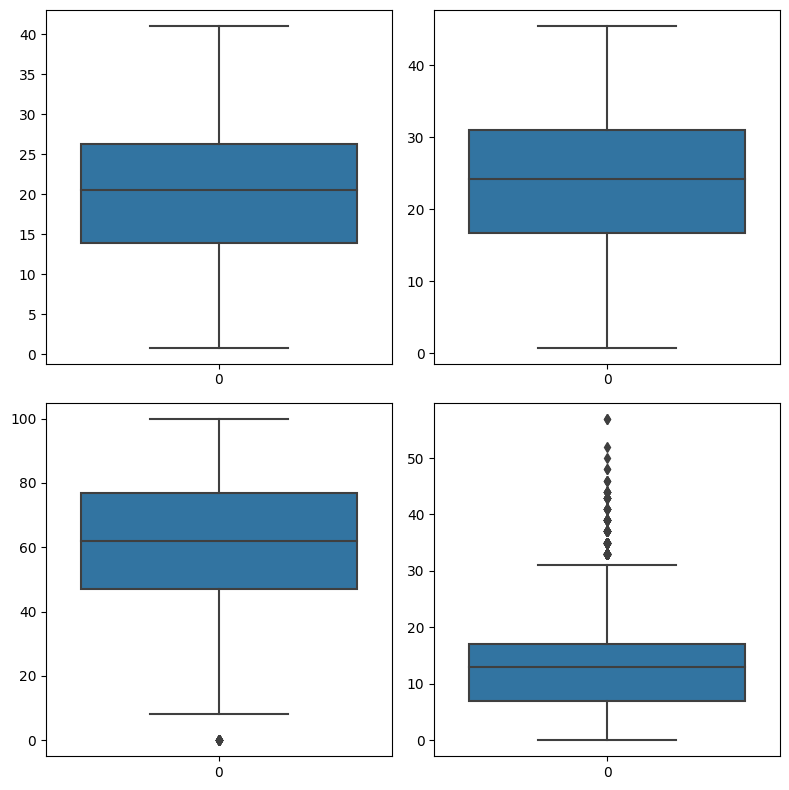

In [19]:
plt.figure(figsize=(8,8))
#수치형 컬럼들에 대해서 scaling 맞춰주기
#MinMaxScaler / Normalizer
#먼저 boxplot을 그려보고, 적절한 스케일러 선택하기
#서브플롯 이용해서 2x2 박스플롯들 시각화하기

numerical_data = ['temp', 'atemp', 'humidity', 'windspeed']
for i in range(len(numerical_data)):
    plt.subplot(2,2,i+1)
    sns.boxplot(train_x[numerical_data[i]])
    plt.tight_layout()

plt.show()

train & validation 데이터 스플릿

In [20]:
train_x['hour'] = train_x.index.hour

In [21]:
train_x

,season,weather,temp,atemp,humidity,windspeed,day_type,hour
datetime,,,,,,,,
2011-01-01 00:00:00,1,1,9.84,14.395,81,0.0000,2,0
2011-01-01 01:00:00,1,1,9.02,13.635,80,0.0000,2,1
2011-01-01 02:00:00,1,1,9.02,13.635,80,0.0000,2,2
2011-01-01 03:00:00,1,1,9.84,14.395,75,0.0000,2,3
2011-01-01 04:00:00,1,1,9.84,14.395,75,0.0000,2,4
...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,1,15.58,19.695,50,26.0027,1,19
2012-12-19 20:00:00,4,1,14.76,17.425,57,15.0013,1,20
2012-12-19 21:00:00,4,1,13.94,15.910,61,15.0013,1,21


In [22]:
train_y

datetime
2011-01-01 00:00:00     16
2011-01-01 01:00:00     40
2011-01-01 02:00:00     32
2011-01-01 03:00:00     13
2011-01-01 04:00:00      1
                      ... 
2012-12-19 19:00:00    336
2012-12-19 20:00:00    241
2012-12-19 21:00:00    168
2012-12-19 22:00:00    129
2012-12-19 23:00:00     88
Name: count, Length: 10886, dtype: int64

In [23]:
train_x['count'] = train_y

In [24]:
train_x

,season,weather,temp,atemp,humidity,windspeed,day_type,hour,count
datetime,,,,,,,,,
2011-01-01 00:00:00,1,1,9.84,14.395,81,0.0000,2,0,16
2011-01-01 01:00:00,1,1,9.02,13.635,80,0.0000,2,1,40
2011-01-01 02:00:00,1,1,9.02,13.635,80,0.0000,2,2,32
2011-01-01 03:00:00,1,1,9.84,14.395,75,0.0000,2,3,13
2011-01-01 04:00:00,1,1,9.84,14.395,75,0.0000,2,4,1
...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,1,15.58,19.695,50,26.0027,1,19,336
2012-12-19 20:00:00,4,1,14.76,17.425,57,15.0013,1,20,241
2012-12-19 21:00:00,4,1,13.94,15.910,61,15.0013,1,21,168


In [25]:
train_x.to_csv('preprocessed_train.csv')

#### 2차 EDA
1. 시계열 인덱스에서 hour 이외에도 유의미한 값들 컬럼으로 추가 분리
2. 변수들 간 상관관계 분석하기
3. 수치형 변수들 스케일 조정
4. y값(count) 스케일 조정

할 것들
-변수들 간 상관관계 분석하기(상관 행렬 시각화)

시계열 데이터 시간 간격이 1H이기 때문에 hour보다 작은 단위인 min, sec은 분석 의미가 없음

In [26]:
train_data = pd.read_csv('preprocessed_train.csv', index_col='datetime')
train_data.index = pd.to_datetime(train_data.index)

In [27]:
dir(train_data.index[0])
train_data.index[0].dayofweek

5

In [28]:
train_data_y = train_data['count']
#train_data = train_data.drop(columns=['count'])
display(train_data)
display(train_data_y)

,season,weather,temp,atemp,humidity,windspeed,day_type,hour,count
datetime,,,,,,,,,
2011-01-01 00:00:00,1,1,9.84,14.395,81,0.0000,2,0,16
2011-01-01 01:00:00,1,1,9.02,13.635,80,0.0000,2,1,40
2011-01-01 02:00:00,1,1,9.02,13.635,80,0.0000,2,2,32
2011-01-01 03:00:00,1,1,9.84,14.395,75,0.0000,2,3,13
2011-01-01 04:00:00,1,1,9.84,14.395,75,0.0000,2,4,1
...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,1,15.58,19.695,50,26.0027,1,19,336
2012-12-19 20:00:00,4,1,14.76,17.425,57,15.0013,1,20,241
2012-12-19 21:00:00,4,1,13.94,15.910,61,15.0013,1,21,168


datetime
2011-01-01 00:00:00     16
2011-01-01 01:00:00     40
2011-01-01 02:00:00     32
2011-01-01 03:00:00     13
2011-01-01 04:00:00      1
                      ... 
2012-12-19 19:00:00    336
2012-12-19 20:00:00    241
2012-12-19 21:00:00    168
2012-12-19 22:00:00    129
2012-12-19 23:00:00     88
Name: count, Length: 10886, dtype: int64

In [29]:
train_data['year'] = train_data.index.year
train_data['month'] = train_data.index.month
train_data['day'] = train_data.index.day
train_data['day_of_week'] = train_data.index.dayofweek
display(train_data)


,season,weather,temp,atemp,humidity,windspeed,day_type,hour,count,year,month,day,day_of_week
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,1,9.84,14.395,81,0.0000,2,0,16,2011,1,1,5
2011-01-01 01:00:00,1,1,9.02,13.635,80,0.0000,2,1,40,2011,1,1,5
2011-01-01 02:00:00,1,1,9.02,13.635,80,0.0000,2,2,32,2011,1,1,5
2011-01-01 03:00:00,1,1,9.84,14.395,75,0.0000,2,3,13,2011,1,1,5
2011-01-01 04:00:00,1,1,9.84,14.395,75,0.0000,2,4,1,2011,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,1,15.58,19.695,50,26.0027,1,19,336,2012,12,19,2
2012-12-19 20:00:00,4,1,14.76,17.425,57,15.0013,1,20,241,2012,12,19,2
2012-12-19 21:00:00,4,1,13.94,15.910,61,15.0013,1,21,168,2012,12,19,2


In [30]:
#!pip install matplot==0.1.9

In [31]:
#!pip install matplotlib-inline==0.1.7

In [32]:
#!pip install matplotlib==3.9.2

In [33]:
train_data

,season,weather,temp,atemp,humidity,windspeed,day_type,hour,count,year,month,day,day_of_week
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,1,9.84,14.395,81,0.0000,2,0,16,2011,1,1,5
2011-01-01 01:00:00,1,1,9.02,13.635,80,0.0000,2,1,40,2011,1,1,5
2011-01-01 02:00:00,1,1,9.02,13.635,80,0.0000,2,2,32,2011,1,1,5
2011-01-01 03:00:00,1,1,9.84,14.395,75,0.0000,2,3,13,2011,1,1,5
2011-01-01 04:00:00,1,1,9.84,14.395,75,0.0000,2,4,1,2011,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,1,15.58,19.695,50,26.0027,1,19,336,2012,12,19,2
2012-12-19 20:00:00,4,1,14.76,17.425,57,15.0013,1,20,241,2012,12,19,2
2012-12-19 21:00:00,4,1,13.94,15.910,61,15.0013,1,21,168,2012,12,19,2


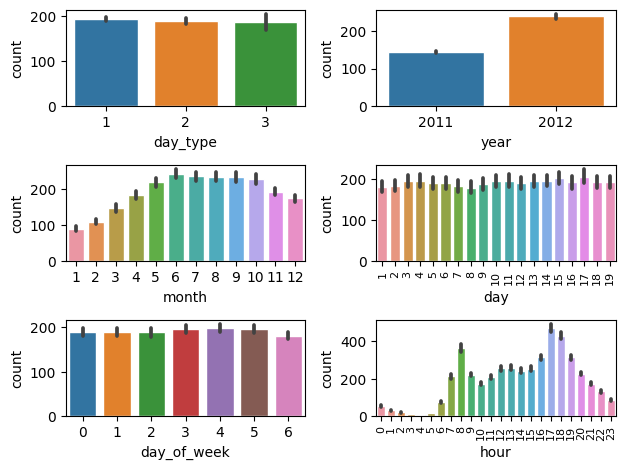

In [34]:
figure, axes = plt.subplots(nrows=3, ncols=2)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x='day_type', y='count', data=train_data, ax=axes[0,0])
sns.barplot(x='year', y='count', data=train_data, ax=axes[0,1])
sns.barplot(x='month', y='count', data=train_data, ax=axes[1,0])
sns.barplot(x='day', y='count', data=train_data, ax=axes[1,1])
sns.barplot(x='day_of_week', y='count', data=train_data, ax=axes[2,0])
sns.barplot(x='hour', y='count', data=train_data, ax=axes[2,1])
plt.tight_layout()
axes[1,1].tick_params(axis='x', labelrotation=90, labelsize=8)
axes[2,1].tick_params(axis='x', labelrotation=90, labelsize=8)
plt.show()

<시각화 결과>\
day_type, day_of_week 큰 의미 없음\
year, month, hour 유의미함\
day 무의미

In [35]:
train_data

,season,weather,temp,atemp,humidity,windspeed,day_type,hour,count,year,month,day,day_of_week
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,1,9.84,14.395,81,0.0000,2,0,16,2011,1,1,5
2011-01-01 01:00:00,1,1,9.02,13.635,80,0.0000,2,1,40,2011,1,1,5
2011-01-01 02:00:00,1,1,9.02,13.635,80,0.0000,2,2,32,2011,1,1,5
2011-01-01 03:00:00,1,1,9.84,14.395,75,0.0000,2,3,13,2011,1,1,5
2011-01-01 04:00:00,1,1,9.84,14.395,75,0.0000,2,4,1,2011,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,1,15.58,19.695,50,26.0027,1,19,336,2012,12,19,2
2012-12-19 20:00:00,4,1,14.76,17.425,57,15.0013,1,20,241,2012,12,19,2
2012-12-19 21:00:00,4,1,13.94,15.910,61,15.0013,1,21,168,2012,12,19,2


In [36]:
train_data = train_data.drop(columns=['day_type', 'day', 'day_of_week'])
train_data

,season,weather,temp,atemp,humidity,windspeed,hour,count,year,month
datetime,,,,,,,,,,
2011-01-01 00:00:00,1,1,9.84,14.395,81,0.0000,0,16,2011,1
2011-01-01 01:00:00,1,1,9.02,13.635,80,0.0000,1,40,2011,1
2011-01-01 02:00:00,1,1,9.02,13.635,80,0.0000,2,32,2011,1
2011-01-01 03:00:00,1,1,9.84,14.395,75,0.0000,3,13,2011,1
2011-01-01 04:00:00,1,1,9.84,14.395,75,0.0000,4,1,2011,1
...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,1,15.58,19.695,50,26.0027,19,336,2012,12
2012-12-19 20:00:00,4,1,14.76,17.425,57,15.0013,20,241,2012,12
2012-12-19 21:00:00,4,1,13.94,15.910,61,15.0013,21,168,2012,12


<Axes: xlabel='season', ylabel='month'>

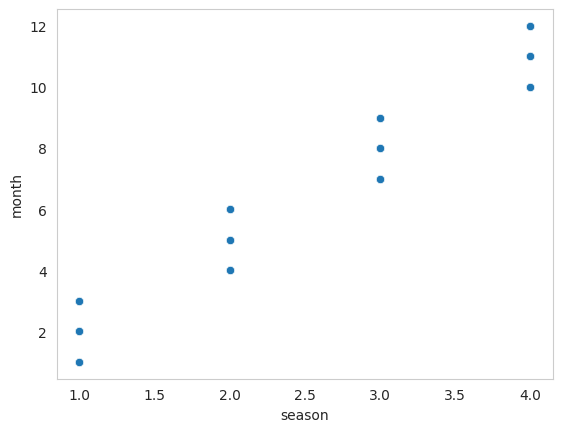

In [37]:
sns.scatterplot(data=train_data, x='season', y='month')

In [38]:
train_data = train_data.drop(columns=['season'])
train_data

,weather,temp,atemp,humidity,windspeed,hour,count,year,month
datetime,,,,,,,,,
2011-01-01 00:00:00,1,9.84,14.395,81,0.0000,0,16,2011,1
2011-01-01 01:00:00,1,9.02,13.635,80,0.0000,1,40,2011,1
2011-01-01 02:00:00,1,9.02,13.635,80,0.0000,2,32,2011,1
2011-01-01 03:00:00,1,9.84,14.395,75,0.0000,3,13,2011,1
2011-01-01 04:00:00,1,9.84,14.395,75,0.0000,4,1,2011,1
...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,1,15.58,19.695,50,26.0027,19,336,2012,12
2012-12-19 20:00:00,1,14.76,17.425,57,15.0013,20,241,2012,12
2012-12-19 21:00:00,1,13.94,15.910,61,15.0013,21,168,2012,12


In [39]:
train_data = train_data.drop(columns=['atemp'])
train_data

,weather,temp,humidity,windspeed,hour,count,year,month
datetime,,,,,,,,
2011-01-01 00:00:00,1,9.84,81,0.0000,0,16,2011,1
2011-01-01 01:00:00,1,9.02,80,0.0000,1,40,2011,1
2011-01-01 02:00:00,1,9.02,80,0.0000,2,32,2011,1
2011-01-01 03:00:00,1,9.84,75,0.0000,3,13,2011,1
2011-01-01 04:00:00,1,9.84,75,0.0000,4,1,2011,1
...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,1,15.58,50,26.0027,19,336,2012,12
2012-12-19 20:00:00,1,14.76,57,15.0013,20,241,2012,12
2012-12-19 21:00:00,1,13.94,61,15.0013,21,168,2012,12


In [40]:
train_data['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [41]:
pip install seaborn --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.9.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


<Axes: >

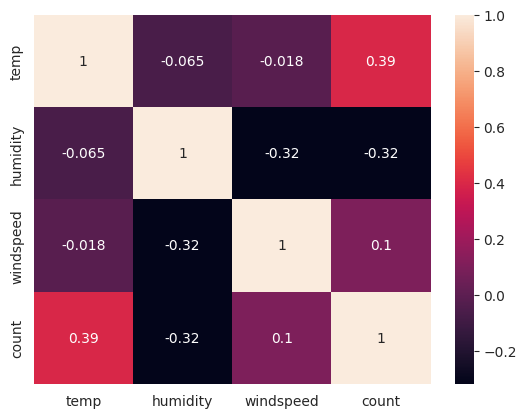

In [42]:
corrmat = train_data[['temp', 'humidity', 'windspeed', 'count']].corr()
sns.heatmap(corrmat, annot=True)

In [43]:
train_data = train_data.drop(columns=['count'])
train_data['count'] = train_data_y
train_data

,weather,temp,humidity,windspeed,hour,year,month,count
datetime,,,,,,,,
2011-01-01 00:00:00,1,9.84,81,0.0000,0,2011,1,16
2011-01-01 01:00:00,1,9.02,80,0.0000,1,2011,1,40
2011-01-01 02:00:00,1,9.02,80,0.0000,2,2011,1,32
2011-01-01 03:00:00,1,9.84,75,0.0000,3,2011,1,13
2011-01-01 04:00:00,1,9.84,75,0.0000,4,2011,1,1
...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,1,15.58,50,26.0027,19,2012,12,336
2012-12-19 20:00:00,1,14.76,57,15.0013,20,2012,12,241
2012-12-19 21:00:00,1,13.94,61,15.0013,21,2012,12,168


In [44]:
train_data.to_csv('preprocessed_train_v2.csv')

In [45]:
v1_train_data = pd.read_csv('/kaggle/working/preprocessed_train.csv')

In [46]:
train_data.describe()

,weather,temp,humidity,windspeed,hour,year,month,count
count,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,1.418427,20.23086,61.886460,12.799395,11.541613,2011.501929,6.521495,191.574132
std,0.633839,7.79159,19.245033,8.164537,6.915838,0.500019,3.444373,181.144454
min,1.000000,0.82000,0.000000,0.000000,0.000000,2011.000000,1.000000,1.000000
25%,1.000000,13.94000,47.000000,7.001500,6.000000,2011.000000,4.000000,42.000000
50%,1.000000,20.50000,62.000000,12.998000,12.000000,2012.000000,7.000000,145.000000
75%,2.000000,26.24000,77.000000,16.997900,18.000000,2012.000000,10.000000,284.000000
max,4.000000,41.00000,100.000000,56.996900,23.000000,2012.000000,12.000000,977.000000


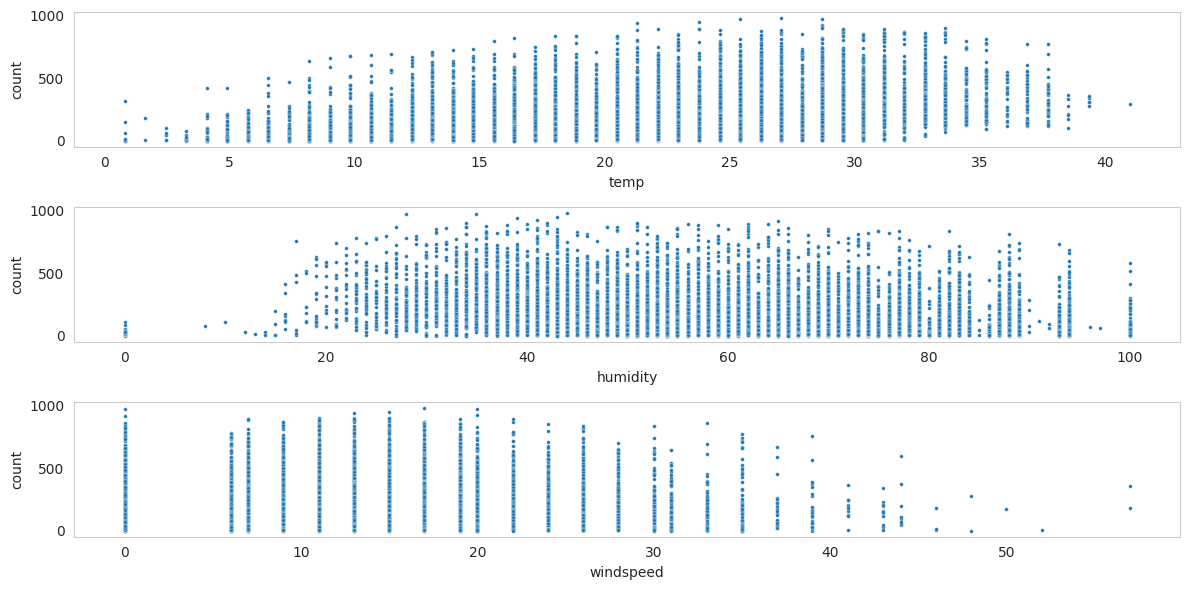

In [47]:
figure, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 6))
sns.set_style("whitegrid", {'axes.grid' : False})

sns.scatterplot(x='temp', y='count', data=train_data, ax=axes[0], s= 7)
sns.scatterplot(x='humidity', y='count', data=train_data, ax=axes[1], s= 7)
sns.scatterplot(x='windspeed', y='count', data=train_data, ax=axes[2], s= 7)

plt.tight_layout()
plt.show()

In [48]:
train_data['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [49]:
train_data['year'].value_counts()

year
2012    5464
2011    5422
Name: count, dtype: int64

In [50]:
train_data

,weather,temp,humidity,windspeed,hour,year,month,count
datetime,,,,,,,,
2011-01-01 00:00:00,1,9.84,81,0.0000,0,2011,1,16
2011-01-01 01:00:00,1,9.02,80,0.0000,1,2011,1,40
2011-01-01 02:00:00,1,9.02,80,0.0000,2,2011,1,32
2011-01-01 03:00:00,1,9.84,75,0.0000,3,2011,1,13
2011-01-01 04:00:00,1,9.84,75,0.0000,4,2011,1,1
...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,1,15.58,50,26.0027,19,2012,12,336
2012-12-19 20:00:00,1,14.76,57,15.0013,20,2012,12,241
2012-12-19 21:00:00,1,13.94,61,15.0013,21,2012,12,168


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


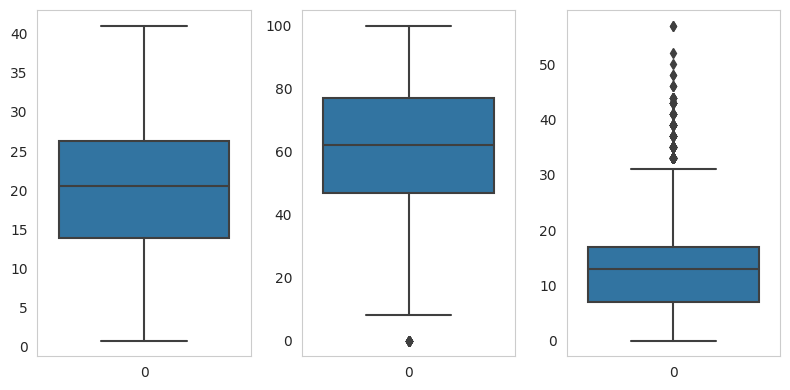

In [51]:
plt.figure(figsize=(8,4))
#수치형 컬럼들에 대해서 scaling 맞춰주기
#MinMaxScaler / Normalizer
#먼저 boxplot을 그려보고, 적절한 스케일러 선택하기
#서브플롯 이용해서 2x2 박스플롯들 시각화하기

numerical_data = ['temp', 'humidity', 'windspeed']
for i in range(len(numerical_data)):
    plt.subplot(1,3,i+1)
    sns.boxplot(train_data[numerical_data[i]])
    plt.tight_layout()

plt.show()

In [52]:
#atemp보다 temp가 정규분포에 가까
#humidity 이상치 = 0
#windspeed 이상치 높은곳에 많음, 임계점을 넘지 않는 값들은 모두 0으로 처리된것으로 보임

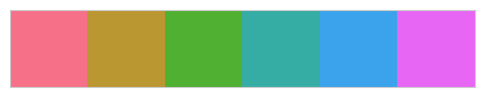

In [53]:
palette = sns.color_palette('husl')
sns.palplot(palette)
sns.set_palette('husl')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


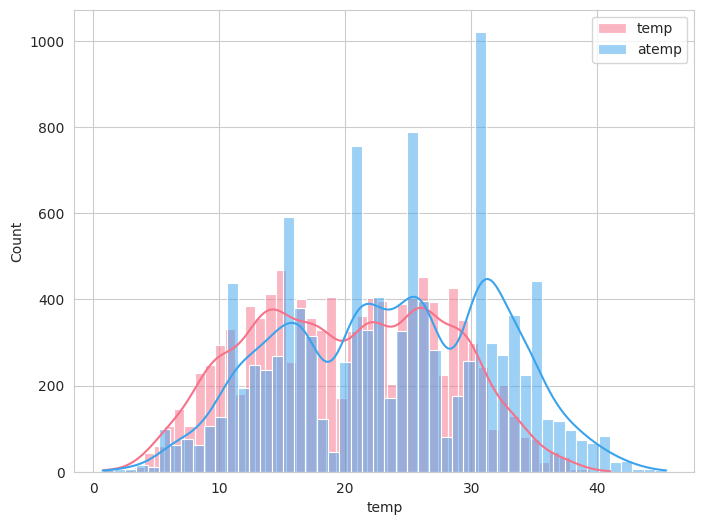

In [54]:
plt.figure(figsize=(8, 6))
sns.histplot(train_data['temp'], bins=50, alpha = 0.5, kde=True, label='temp', color=palette[0])
sns.histplot(v1_train_data['atemp'], bins=50, alpha = 0.5, kde=True, label='atemp', color=palette[4])
plt.legend()
plt.grid()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='humidity', ylabel='Count'>

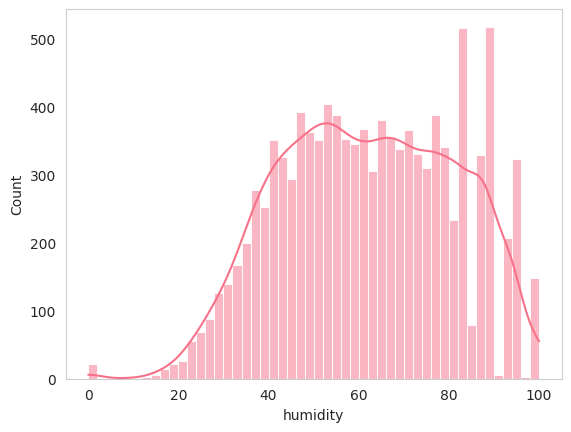

In [55]:
sns.histplot(train_data['humidity'], bins=50, kde=True)

In [56]:
train_data['windspeed'].describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='windspeed', ylabel='Count'>

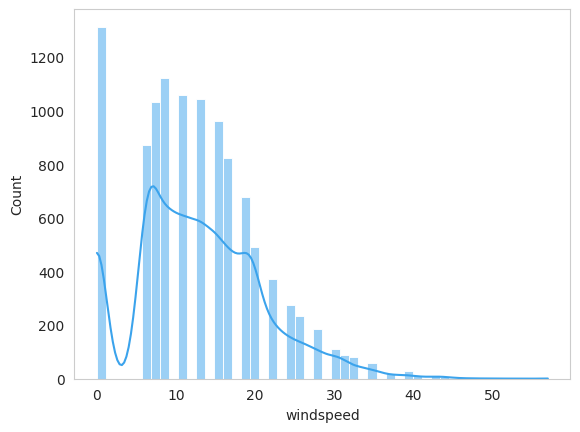

In [57]:
sns.histplot(train_data['windspeed'], bins=50, kde=True, color=palette[4])

In [58]:
train_data['windspeed'].describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

In [59]:
train_data
#humidity : RobustScaler
#windspeed : RobustScaler
#year - 2011:1, 2012: 2

,weather,temp,humidity,windspeed,hour,year,month,count
datetime,,,,,,,,
2011-01-01 00:00:00,1,9.84,81,0.0000,0,2011,1,16
2011-01-01 01:00:00,1,9.02,80,0.0000,1,2011,1,40
2011-01-01 02:00:00,1,9.02,80,0.0000,2,2011,1,32
2011-01-01 03:00:00,1,9.84,75,0.0000,3,2011,1,13
2011-01-01 04:00:00,1,9.84,75,0.0000,4,2011,1,1
...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,1,15.58,50,26.0027,19,2012,12,336
2012-12-19 20:00:00,1,14.76,57,15.0013,20,2012,12,241
2012-12-19 21:00:00,1,13.94,61,15.0013,21,2012,12,168


In [60]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(train_data['humidity'].values.reshape(-1, 1))
train_data['humidity'] = transformer.transform(train_data['humidity'].values.reshape(-1, 1))

In [61]:
transformer = RobustScaler().fit(train_data['windspeed'].values.reshape(-1, 1))
train_data['windspeed'] = transformer.transform(train_data['windspeed'].values.reshape(-1, 1))

In [62]:
train_data

,weather,temp,humidity,windspeed,hour,year,month,count
datetime,,,,,,,,
2011-01-01 00:00:00,1,9.84,0.633333,-1.300268,0,2011,1,16
2011-01-01 01:00:00,1,9.02,0.600000,-1.300268,1,2011,1,40
2011-01-01 02:00:00,1,9.02,0.600000,-1.300268,2,2011,1,32
2011-01-01 03:00:00,1,9.84,0.433333,-1.300268,3,2011,1,13
2011-01-01 04:00:00,1,9.84,0.433333,-1.300268,4,2011,1,1
...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,1,15.58,-0.400000,1.300938,19,2012,12,336
2012-12-19 20:00:00,1,14.76,-0.166667,0.200402,20,2012,12,241
2012-12-19 21:00:00,1,13.94,-0.033333,0.200402,21,2012,12,168


In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data['temp'] = scaler.fit_transform(train_data['temp'].values.reshape(-1, 1))

In [64]:
train_data

,weather,temp,humidity,windspeed,hour,year,month,count
datetime,,,,,,,,
2011-01-01 00:00:00,1,-1.333661,0.633333,-1.300268,0,2011,1,16
2011-01-01 01:00:00,1,-1.438907,0.600000,-1.300268,1,2011,1,40
2011-01-01 02:00:00,1,-1.438907,0.600000,-1.300268,2,2011,1,32
2011-01-01 03:00:00,1,-1.333661,0.433333,-1.300268,3,2011,1,13
2011-01-01 04:00:00,1,-1.333661,0.433333,-1.300268,4,2011,1,1
...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,1,-0.596935,-0.400000,1.300938,19,2012,12,336
2012-12-19 20:00:00,1,-0.702182,-0.166667,0.200402,20,2012,12,241
2012-12-19 21:00:00,1,-0.807428,-0.033333,0.200402,21,2012,12,168


In [65]:
def year_map(row):
    year_mapping = {
        2011:1,
        2012:2
    }
    return year_mapping[row['year']]
train_data['year'] = train_data.apply(year_map, axis=1)

In [66]:
train_data

,weather,temp,humidity,windspeed,hour,year,month,count
datetime,,,,,,,,
2011-01-01 00:00:00,1,-1.333661,0.633333,-1.300268,0,1,1,16
2011-01-01 01:00:00,1,-1.438907,0.600000,-1.300268,1,1,1,40
2011-01-01 02:00:00,1,-1.438907,0.600000,-1.300268,2,1,1,32
2011-01-01 03:00:00,1,-1.333661,0.433333,-1.300268,3,1,1,13
2011-01-01 04:00:00,1,-1.333661,0.433333,-1.300268,4,1,1,1
...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,1,-0.596935,-0.400000,1.300938,19,2,12,336
2012-12-19 20:00:00,1,-0.702182,-0.166667,0.200402,20,2,12,241
2012-12-19 21:00:00,1,-0.807428,-0.033333,0.200402,21,2,12,168


In [67]:
'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data['hour'] = scaler.fit_transform(train_data['hour'].values.reshape(-1, 1))
train_data['month'] = scaler.fit_transform(train_data['month'].values.reshape(-1, 1))
train_data'''

"from sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\ntrain_data['hour'] = scaler.fit_transform(train_data['hour'].values.reshape(-1, 1))\ntrain_data['month'] = scaler.fit_transform(train_data['month'].values.reshape(-1, 1))\ntrain_data"

In [68]:
train_data

,weather,temp,humidity,windspeed,hour,year,month,count
datetime,,,,,,,,
2011-01-01 00:00:00,1,-1.333661,0.633333,-1.300268,0,1,1,16
2011-01-01 01:00:00,1,-1.438907,0.600000,-1.300268,1,1,1,40
2011-01-01 02:00:00,1,-1.438907,0.600000,-1.300268,2,1,1,32
2011-01-01 03:00:00,1,-1.333661,0.433333,-1.300268,3,1,1,13
2011-01-01 04:00:00,1,-1.333661,0.433333,-1.300268,4,1,1,1
...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,1,-0.596935,-0.400000,1.300938,19,2,12,336
2012-12-19 20:00:00,1,-0.702182,-0.166667,0.200402,20,2,12,241
2012-12-19 21:00:00,1,-0.807428,-0.033333,0.200402,21,2,12,168


In [69]:
train_data.to_csv('preprocessed_train_v3.csv')

In [70]:
import numpy as np
train_data['count'] = np.log(train_data['count'])
train_data

,weather,temp,humidity,windspeed,hour,year,month,count
datetime,,,,,,,,
2011-01-01 00:00:00,1,-1.333661,0.633333,-1.300268,0,1,1,2.772589
2011-01-01 01:00:00,1,-1.438907,0.600000,-1.300268,1,1,1,3.688879
2011-01-01 02:00:00,1,-1.438907,0.600000,-1.300268,2,1,1,3.465736
2011-01-01 03:00:00,1,-1.333661,0.433333,-1.300268,3,1,1,2.564949
2011-01-01 04:00:00,1,-1.333661,0.433333,-1.300268,4,1,1,0.000000
...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,1,-0.596935,-0.400000,1.300938,19,2,12,5.817111
2012-12-19 20:00:00,1,-0.702182,-0.166667,0.200402,20,2,12,5.484797
2012-12-19 21:00:00,1,-0.807428,-0.033333,0.200402,21,2,12,5.123964


In [71]:
train_data.to_csv('preprocessed_train_v3.csv')